# Techniques for Calculating the Efficient Frontier

## Short Sales Allowed with Riskless Lending and Borrowing

There is a single portfolio in return volatility space that is prefered to all other portfolios. The portfolio plots on the ray connecting the riskless asset and a risky portfolio.

**Maximise**

$$ \theta = \frac{\bar{R_{\pi}} - R_F}{\sigma_{\pi}}$$

**Subject to**

$$ \sum_{i=1}^N X_i = 1$$

In [18]:
import numpy as np

In [66]:
R̄ = np.array([0.14, 0.08, 0.20])

cov = np.array([
    [0.06,      0.5*0.06*0.03, 0.2*0.06*0.15],
    [0.5*0.06*0.03, 0.03,      0.4*0.03*0.15],
    [0.2*0.06*0.15, 0.4*0.03*0.15, 0.15]
])

R_f = 0.05

In [67]:
δR = R̄-R_f

In [68]:
A = (cov*np.eye(3))**2 + (np.ones(3) - np.eye(3))*cov

In [69]:
Z = np.linalg.inv(A).dot(δR)

In [70]:
X = Z/sum(Z)

In [71]:
X

array([0.77777778, 0.05555556, 0.16666667])

## No Short Selling and No Riskless Lending and Borrowing

The efficient set is found by minimising the risk level for a given level of expected return. Therfore, one can specify the return at some level and minimize the risk, obtaining a single point on the efficient frontier. We can fromalize this by say we seek to 

**Minimize**

$$ \sum_{i=1}^N X_i^2\sigma_i^2 + \sum_{i=1}^N \sum_{j=1,j\neq i}^N X_iX_j \sigma_i^2 \sigma_j^2$$

**Subject to**

$$ \sum_{i=1}^N X_i = 1$$

$$ \sum_{i=1}^N X_i \bar{R}_i = \bar{R}_{\pi}$$

$$ X_i \geq 0 \text{, i=1,...,N}$$

In [448]:
import cvxopt 
from cvxopt import matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [520]:
avg_ret = [ .0215, .0267, .0158 , .0452, .0318]

cov = [[.0096, .0089, .0046, .0019, .0137],
        [.0089, .0440, .0064, .0071, .0232],
        [.0046, .0064, .0088, .0036, .0048],
        [.0019, .0071, .0036, .0824, .0052],
        [.0137, .0232, .0048, .0052, .0878]]

In [521]:
n = 5

In [522]:
# P matrix is the covariance matrix
P = opt.matrix(cov)

In [523]:
# no constraint on q
q = opt.matrix(np.zeros((n, 1)))

In [524]:
G = opt.matrix(np.concatenate((
                -np.transpose(np.array(avg_ret))[None,:], 
                -np.identity(n)), 0))

In [525]:
np.array(G)

array([[-0.0215, -0.0267, -0.0158, -0.0452, -0.0318],
       [-1.    , -0.    , -0.    , -0.    , -0.    ],
       [-0.    , -1.    , -0.    , -0.    , -0.    ],
       [-0.    , -0.    , -1.    , -0.    , -0.    ],
       [-0.    , -0.    , -0.    , -1.    , -0.    ],
       [-0.    , -0.    , -0.    , -0.    , -1.    ]])

In [561]:
h = opt.matrix(np.concatenate((np.ones((1,1))*-0.0452, np.zeros((n,1)))))

In [562]:
np.array(h)

array([[-0.0452],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ]])

In [563]:
A = opt.matrix(1.0, (1,n))
b = opt.matrix(1.0)


In [564]:
opt.solvers.options['show_progress'] = False
sol = opt.solvers.qp(P, q, G, h, A, b)

In [565]:
weights = np.array(sol['x'])

In [566]:
print(weights)

[[-2.96048941e-10]
 [ 2.80905875e-09]
 [ 1.49533326e-09]
 [ 9.99999972e-01]
 [ 2.43412745e-08]]


In [567]:
avg_ret

[0.0215, 0.0267, 0.0158, 0.0452, 0.0318]

In [568]:
weights.T@avg_ret

array([0.0452])

In [569]:
weights.T@cov@weights

array([[0.0824]])

In [551]:
def efficient_frontier(r̄, cov):
    n = len(r̄)
    
    P = opt.matrix(cov)
    q = opt.matrix(np.zeros((n, 1)))
    G = opt.matrix(np.concatenate((
                -np.transpose(np.array(r̄))[None,:], 
                -np.identity(n)), 0))
    
    A = opt.matrix(1.0, (1,n))
    b = opt.matrix(1.0)
    
    min_r̄ = min(r̄)
    max_r̄ = max(r̄)
    print(min_r̄)
    R_π = []
    σ_π = []
    for r in np.arange(min_r̄, max_r̄, 0.001):
        h = opt.matrix(np.concatenate((np.ones((1,1))*-r, np.zeros((n,1)))))
        sol = opt.solvers.qp(P, q, G, h, A, b)
        weights = np.array(sol['x'])
        R_π.append(weights.T@r̄)
        σ_π.append((weights.T@cov@weights)[0])
        
    print(R_π)
    σs = np.diag(cov)
    
    plt.title('Efficient Frontier', size = 18)
    plt.plot(σ_π, R_π)
    plt.scatter(σs, r̄, marker='x', color='red', s=100)
    

    plt.ylabel('$r_p$', size=14)
    plt.xlabel('$\sigma_p$', size=14)
    plt.show()
        
    


0.0158
[array([0.01975913]), array([0.01975913]), array([0.01975913]), array([0.01975914]), array([0.01981101]), array([0.0208]), array([0.0218]), array([0.0228]), array([0.0238]), array([0.0248]), array([0.0258]), array([0.0268]), array([0.0278]), array([0.0288]), array([0.0298]), array([0.0308]), array([0.0318]), array([0.0328]), array([0.0338]), array([0.0348]), array([0.0358]), array([0.0368]), array([0.0378]), array([0.0388]), array([0.0398]), array([0.0408]), array([0.0418]), array([0.0428]), array([0.0438]), array([0.0448])]


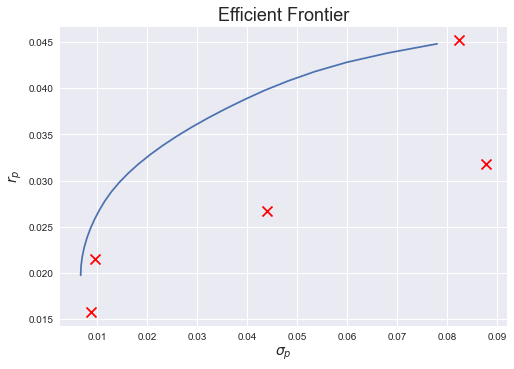

In [552]:
efficient_frontier(avg_ret, cov)